- 던파는 잘만든 게임으로 유명하지만, 입문하기 어려운 것으로도 유명하다.
- 때문에 매년 "뉴비 가이드"를 작성하는 유저들이 많지만 재미를 위해 시작한 뉴비들이 가이드까지 찾아보며 공부하고 적응하기란 쉽지 않다.
- 때문에 뉴비 입장에서, 게임 플레이 도중 아이템, 스킬을 구매/장착할 때마다 일일이 추천해 가이드하는 것이 적응에 도움을 주리라 생각한다

In [1138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [ ]:
from urllib import parse
import requests
import json

In [1177]:
bold = fm.FontProperties(fname='/Library/Fonts/malgunbd.ttf')
light = fm.FontProperties(fname='/Library/Fonts/malgun.ttf')

In [727]:
user = pd.read_csv('/Users/hayeon/Downloads/게임 데이터 분석/DATA/all_user.csv', index_col=0)

# 유저 정보
## 1) 서버 별 유저 수 

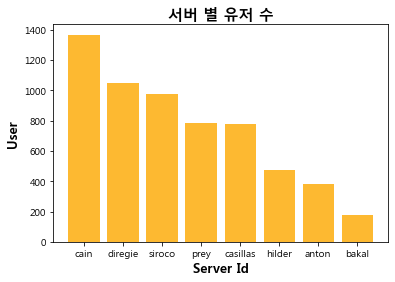

In [1178]:
plt.bar(user['serverId'].unique(), sorted(user.groupby('serverId').count()['characterId'], reverse=True), color='#FDB931')
plt.title('서버 별 유저 수', fontsize=15, fontproperties=bold)
plt.xlabel('Server Id', fontsize=13, fontproperties=bold)
plt.ylabel('User', fontsize=13, fontproperties=bold)
plt.xticks(fontproperties=light)
plt.yticks(fontproperties=light)
plt.savefig('server_per_user.png')
plt.show()

## 2) 유저 레벨 분포

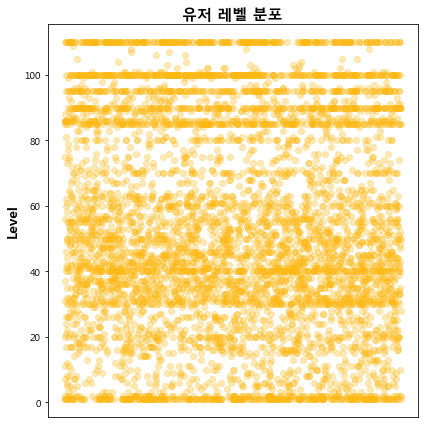

In [1189]:
plt.figure(figsize=(6,6))

plt.scatter(range(0, len(user)), user['level'], c='#FDB913', edgecolors='#FDB913', alpha=0.3)
#plt.xlabel('유저', , fontproperties=bold)
plt.title('유저 레벨 분포', fontproperties=bold, fontsize=15)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.yticks(fontproperties=light)
plt.ylabel('Level', fontproperties=bold, fontsize=14)
plt.tight_layout() 
plt.savefig('user_level_scatter.png')
plt.show()

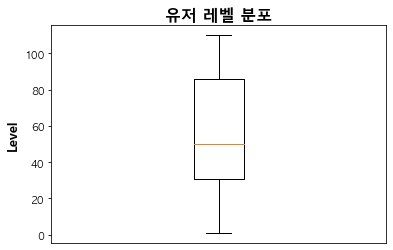

In [1190]:
plt.boxplot(user['level'])

plt.title('유저 레벨 분포', fontsize=16, fontproperties=bold)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)



plt.ylabel('Level', fontproperties=bold, fontsize=13)
plt.savefig('user_level_boxplot.png')
plt.show()

## 3) 캐릭터 별 유저의 레벨 분포

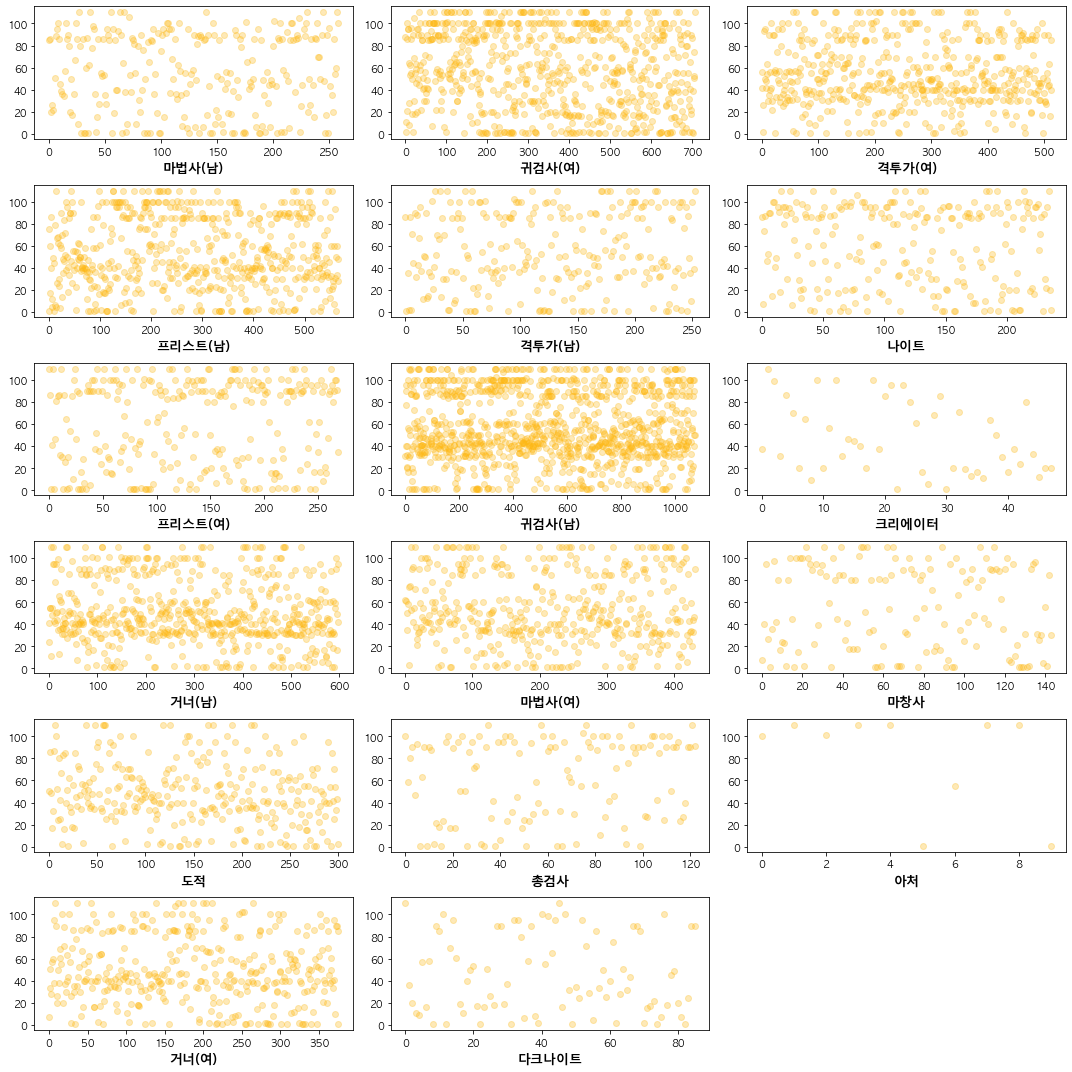

In [1198]:
plt.figure(figsize=(15,15))


for i in range(0, len(user.jobName.unique())):
    plt.subplot(6,3,i+1)
    data = user[user.jobName == user.jobName.unique()[i]]
    plt.scatter(range(0, len(data)), data['level'], c='#FDB913', edgecolors='#FDB913', alpha=0.3)
    plt.xlabel(user.jobName.unique()[i], fontsize=13, fontproperties=bold)
    #plt.ylabel('Level', fontsize=13, fontproperties=bold)
    
plt.tight_layout() 
plt.savefig('character_per_user_level.png')
plt.show()

- 아처 : 23년 2월 출시된 신 캐릭터로 적은 유저 보유
- 다크나이트 & 크리에이터 : 12년 8월 출시
- 마창사 : 16년 1월 출시
- 다수의 유저가 가장 노멀하고 대중적인 귀검사를 사용하고 있음. 

## 4) 직업 별 유저 레벨 분포

In [16]:
job_n = user['jobName'].unique()

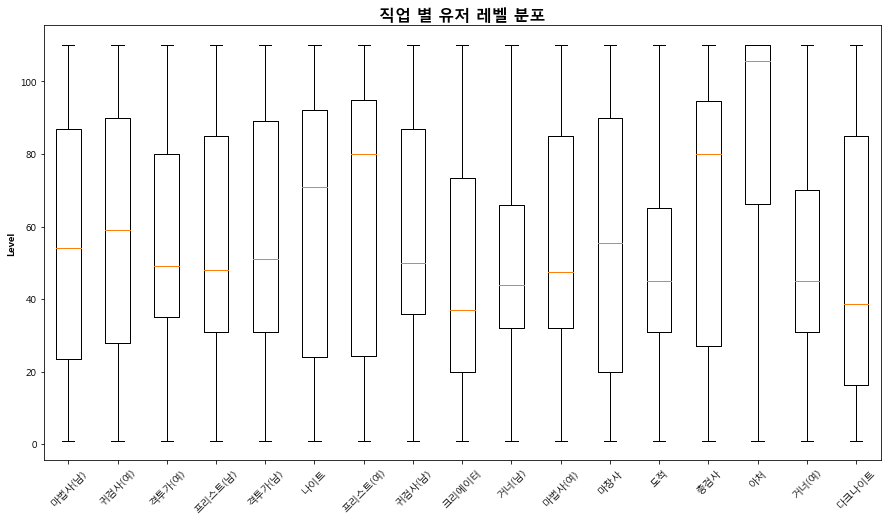

In [1200]:
plt.figure(figsize=(15, 8))
x = [user[user['jobName']==job_n[0]]['level'], user[user['jobName']==job_n[1]]['level'],
            user[user['jobName']==job_n[2]]['level'], user[user['jobName']==job_n[3]]['level'],
            user[user['jobName']==job_n[4]]['level'], user[user['jobName']==job_n[5]]['level'],
            user[user['jobName']==job_n[6]]['level'], user[user['jobName']==job_n[7]]['level'],
            user[user['jobName']==job_n[8]]['level'], user[user['jobName']==job_n[9]]['level'],
            user[user['jobName']==job_n[10]]['level'], user[user['jobName']==job_n[11]]['level'],
            user[user['jobName']==job_n[12]]['level'], user[user['jobName']==job_n[13]]['level'],
            user[user['jobName']==job_n[14]]['level'], user[user['jobName']==job_n[15]]['level'],
            user[user['jobName']==job_n[16]]['level']]
plt.boxplot(x)
plt.xticks(range(1, 18), list(job_n), rotation=45, fontproperties=light)
plt.yticks(fontproperties=light)
plt.title('직업 별 유저 레벨 분포', fontsize=16, fontproperties=bold)
plt.ylabel('Level', fontproperties=bold)
plt.savefig('job_per_user_level_boxplot.png')
plt.show()

- 출시된지 2개월인 "아처"의 레벨 중앙값이 가장 높다. 
- "귀검사(남)"은 많은 유저에 비해 레벨의 중앙값이 낮다. -> 신규 유저의 많은 선택을 받았기 때문일까? 
- "프리스트(여)"는 많은 유저를 갖고 있으면서 중앙값도 높다. -> 이 캐릭터에 재미를 느껴 오래 플레이하는 유저가 많은 것일까? 밸런스가 유난히 높은 것일까? 
- "마법사(남)", "귀검사(여)", "마창사"는 치우치지 않은 분포를 갖고 있다. -> 적절한 밸런스를 가진 캐릭터인가? 

## 5) 캐릭터 발전 단계 별 유저 수
### 뉴비, 전직, 1차 각성, 2차 각성, 만렙을 각 0, 1, 2, 3, 4로 카테고리화한 컬럼 추가 (level_category)

In [728]:
level_cat = []
for i in range(0, len(user)):
    if user['level'][i] < 15:
        level_cat.append(0) # 1~14lv
    elif user['level'][i] < 50:
        level_cat.append(1) # 15~49lv
    elif user['level'][i] < 75:
        level_cat.append(2) # 50~74lv
    elif user['level'][i] < 100:
        level_cat.append(3) # 75~99lv
    else:
        level_cat.append(4) # 100~lv

In [729]:
user['level_category'] = level_cat

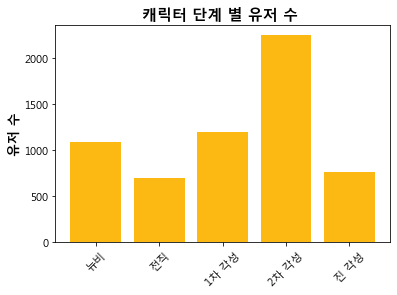

In [1204]:
plt.bar(user['level_category'].unique(), user['level_category'].value_counts(), color='#FDB913')
plt.xticks(range(0, 5), ['뉴비', '전직', '1차 각성', '2차 각성', '진 각성'], rotation=45, fontsize=11, fontproperties=light)
plt.yticks(fontsize=11, fontproperties=light)
plt.ylabel('유저 수', fontsize=13, fontproperties=bold)

plt.title('캐릭터 단계 별 유저 수 ', fontproperties=bold, fontsize=15)
plt.savefig('chr_level_cat.png')
plt.show()

---
# 타임라인 (22년 9월 ~ 23년 4월)
### 저레벨 유저의 플레이시간은 얼마인가?, 이탈한 저레벨 유저가 얼마나 있을까?
* 6000명의 유저 중 22년 9월 ~ 23년 4월 사이 타임라인 데이터가 존재하는 365명의 유저를 대상으로 EDA 진행

In [264]:
timeline = pd.read_csv('/Users/hayeon/Downloads/게임 데이터 분석/DATA/timeline_detail.csv', index_col=0)
timeline.reset_index(drop=True, inplace=True)

### data 컬럼 drop

In [268]:
# data 컬럼은 모든 행이 null이므로 drop 
print(len(timeline[timeline['data'].notnull()]))
timeline.drop('data', axis=1, inplace=True)

0


### datetime 분리하여 컬럼에 추가

In [269]:
from datetime import datetime

year = []
month = []
day = []
hour = []
minute = []

for i in range(0, len(timeline)):
    split_date = datetime.strptime(timeline['date'].iloc[i], "%Y-%m-%d %H:%M")
    year.append(split_date.year)
    month.append(split_date.month)
    day.append(split_date.day)
    hour.append(split_date.hour)
    minute.append(split_date.minute)
    
timeline['year'] = year
timeline['month'] = month
timeline['day'] = day
timeline['hour'] = hour
timeline['minute'] = minute

In [297]:
timeline = timeline[['characterId','code', 'name', 'date', 'data.itemId', 'data.itemName',
       'data.itemRarity', 'year', 'month', 'day', 'hour', 'minute']]

In [298]:
timeline.head(2)

,characterId,code,name,date,data.itemId,data.itemName,data.itemRarity,year,month,day,hour,minute
0,00027d1763a86681b9b410ca5a8537d8,504,아이템 획득(항아리&상자),2022-09-13 19:19,fd5ffa03827b83e0109a3eb1862798eb,디젯 퓨즈 초크,에픽,2022,9,13,19,19
1,00027d1763a86681b9b410ca5a8537d8,405,아이템 새김,2022-10-22 22:12,4276148819c09ecf3bb813bfdf4974e4,근원을 삼킨 건틀릿,에픽,2022,10,22,22,12


## 유저의 날짜 별 게임 시간 살펴보기

In [299]:
pt_time = pd.pivot_table(timeline, 
              index=['characterId', 'month', 'day'],
              values = ['hour', 'minute'], 
              aggfunc=['min', 'max', 'count'])

In [300]:
play_h = []
play_m = []

for i in range(0, len(pt_time)):
    play_h.append(pt_time['max']['hour'][i] - pt_time['min']['hour'][i])
    play_m.append(pt_time['max']['minute'][i] - pt_time['min']['minute'][i])
    
pt_time['play_h'] = play_h
pt_time['play_m'] = play_m

In [598]:
pt_time

min         max        count  \
                                           hour minute hour minute  hour   
characterId                      month day                                 
00027d1763a86681b9b410ca5a8537d8 2     10    19     20   19     20     1   
                                       11    22     24   22     24     1   
                                       15    22     57   22     57     1   
                                       19    22     23   22     23     1   
                                       20    20     52   20     52     1   
...                                         ...    ...  ...    ...   ...   
ff772d5590ac113f1c1402754b908627 3     7     19     22   20     53     2   
                                       8     19      2   23     58     3   
                                       9     19     53   19     53     1   
                                       12    11     35   19     42     2   
                                       13    23     30   23     56     3   

                                                  play_h play_m  
                                           minute                
characterId                      month day                       
00027d1763a86681b9b410ca5a8537d8 2     10       1      0      0  
                                       11       1      0      0  
                                       15       1      0      0  
                                       19       1      0      0  
                                       20       1      0      0  
...                                           ...    ...    ...  
ff772d5590ac113f1c1402754b908627 3     7        2      1     31  
                                       8        3      4     56  
                                       9        1      0      0  
                                       12       2      8      7  
                                       13       3      0     26  

[7677 rows x 8 columns]

### 기존의 date 컬럼  값 형식을 datetime으로 변경

In [324]:
timeline['date'] = pd.to_datetime(timeline['date'])

In [604]:
timeline.groupby(['characterId', 'month', 'day']).count().sort_values('name', ascending=False)

code  name  date  data.itemId  \
characterId                      month day                                  
8b3b8950a6dda83c860678543ebee649 4     3      97    97    97           97   
e02082dd38c428ca4d16dd186564e518 2     13     96    96    96           95   
0e048ba1e3304fe6d75e565783c1548b 12    1      69    69    69           64   
307edff02d923775116aeefd9e9813b5 12    6      68    68    68           62   
41603186b2d365417300c70a03347aac 3     11     65    65    65           65   
...                                          ...   ...   ...          ...   
c109b1796da89343970b54160a01fb53 11    20      1     1     1            1   
                                       18      1     1     1            1   
                                       17      1     1     1            1   
                                       16      1     1     1            1   
00027d1763a86681b9b410ca5a8537d8 2     10      1     1     1            1   

                                            data.itemName  data.itemRarity  \
characterId                      month day                                   
8b3b8950a6dda83c860678543ebee649 4     3               97               97   
e02082dd38c428ca4d16dd186564e518 2     13              95               95   
0e048ba1e3304fe6d75e565783c1548b 12    1               64               64   
307edff02d923775116aeefd9e9813b5 12    6               62               62   
41603186b2d365417300c70a03347aac 3     11              65               65   
...                                                   ...              ...   
c109b1796da89343970b54160a01fb53 11    20               1                1   
                                       18               1                1   
                                       17               1                1   
                                       16               1                1   
00027d1763a86681b9b410ca5a8537d8 2     10               1                1   

                                            year  hour  minute  
characterId                      month day                      
8b3b8950a6dda83c860678543ebee649 4     3      97    97      97  
e02082dd38c428ca4d16dd186564e518 2     13     96    96      96  
0e048ba1e3304fe6d75e565783c1548b 12    1      69    69      69  
307edff02d923775116aeefd9e9813b5 12    6      68    68      68  
41603186b2d365417300c70a03347aac 3     11     65    65      65  
...                                          ...   ...     ...  
c109b1796da89343970b54160a01fb53 11    20      1     1       1  
                                       18      1     1       1  
                                       17      1     1       1  
                                       16      1     1       1  
00027d1763a86681b9b410ca5a8537d8 2     10      1     1       1  

[7677 rows x 9 columns]

### 4월 3일 37분의 플레이 중 97개의 로그가 가능한지 확인

In [610]:
time_user = pd.merge(left=timeline, right=user, on='characterId')

In [611]:
user_time['date'] = pd.to_datetime(user_time['date'])
time_user = time_user[['serverId', 'characterId', 'characterName', 'level', 'level_category', 'jobId',
       'jobGrowId', 'jobName', 'jobGrowName','code', 'name', 'date',
         'data.itemId', 'data.itemName',
       'data.itemRarity', 'year', 'month', 'day', 'hour', 'minute']]

In [612]:
log97 = time_user[time_user['characterId']=='8b3b8950a6dda83c860678543ebee649']
log97 = log97[log97['month']==4][log97[log97['month']==4]['day']==3]
log97.sort_values('date')

,serverId,characterId,characterName,level,level_category,jobId,jobGrowId,jobName,jobGrowName,code,name,date,data.itemId,data.itemName,data.itemRarity,year,month,day,hour,minute
26892,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,505,아이템 획득(던전 드랍),2023-04-03 22:02:00,5ca915f03d8a5a625465366e58bdc67f,흑화의 구속 팔찌,에픽,2023,4,3,22,2
26891,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,505,아이템 획득(던전 드랍),2023-04-03 22:02:00,e9eeb7d5eee037dd736aa65a590d31aa,홀로그램 콜,에픽,2023,4,3,22,2
26889,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,505,아이템 획득(던전 드랍),2023-04-03 22:09:00,6ddc12ba86e14aaa9620cfc0eec38c57,엔트 정령의 신발,에픽,2023,4,3,22,9
26890,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,505,아이템 획득(던전 드랍),2023-04-03 22:09:00,a18edcc238802a9f6b3e494ea30ef1ca,엔트 정령의 심장,에픽,2023,4,3,22,9
26887,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,505,아이템 획득(던전 드랍),2023-04-03 22:21:00,a0a111aea1e5d504dd92d791581557f8,불변의 부유석 벨트,에픽,2023,4,3,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26813,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:39:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,39
26814,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:39:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,39
26815,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:39:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,39
26806,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:39:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,39


In [368]:
log97['name'].value_counts()

레전더리 획득           83
아이템 획득(던전 드랍)      8
아이템 획득(항아리&상자)     6
Name: name, dtype: int64

In [369]:
log97['data.itemName'].value_counts()

심연의 편린 사이드S : 추락하는 영혼    83
미니어쳐 헤드셋 암릿               1
굳건한 믿음                    1
가이드 라인 벨트                 1
천지를 흔드는 석갑                1
흑화의 구속 팔찌                 1
결전의 소검 - 아수라              1
검은 발자국                    1
숲속의 마녀 정령석                1
홀로그램 콜                    1
숲속의 마녀 하의                 1
엔트 정령의 신발                 1
불변의 부유석 벨트                1
엔트 정령의 심장                 1
썬더 레지스트 벨트                1
Name: data.itemName, dtype: int64

In [613]:
log97[log97['data.itemName']=='심연의 편린 사이드S : 추락하는 영혼']#.sort_values('date')

,serverId,characterId,characterName,level,level_category,jobId,jobGrowId,jobName,jobGrowName,code,name,date,data.itemId,data.itemName,data.itemRarity,year,month,day,hour,minute
26796,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:39:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,39
26797,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:39:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,39
26798,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:39:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,39
26799,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:39:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,39
26800,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:39:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:36:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,36
26875,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:36:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,36
26876,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:36:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,36
26877,bakal,8b3b8950a6dda83c860678543ebee649,악마,110,4,f6a4ad30555b99b499c07835f87ce522,c9b492038ee3ca8d27d7004cf58d59f3,프리스트(남),眞 어벤저,502,레전더리 획득,2023-04-03 22:36:00,4d33fd245115988b9c492e18b5612aae,심연의 편린 사이드S : 추락하는 영혼,레전더리,2023,4,3,22,36


### 3분 동안 동일한 아이템을 연속해서 83개를 뽑는 경우를 확인하였다.
- 이상치에 해당하지 않는지 판별이 필요할 것이다.

## 캐릭터 진화 단계 별 범주화 하여 플레이 시간 확인

In [619]:
# 각성을 기준으로 1~15lv, 16~49lv, 50~74lv, 75~99lv, 100~110lv 범주화하여 타임라인 확인
lev_n = ['뉴비(1~14)', '전직(15~49)', '1차 각성(50~74)', '2차 각성(75~99)', '진 각성(100~)']

for i, lev_text in enumerate(lev_n):
    print(lev_n[i])
    level_chr = time_user[time_user['level_category']==i]['characterId'].unique()
    
    for k in range(0, len(level_chr)):
        data = time_user[time_user['characterId']==level_chr[k]]
        print(data['characterName'].unique(), data['level'].unique(), \
              data['date'].min(), '/', data['date'].max())
    print('\n')

뉴비(1~14)
['대공권'] [1] 2022-09-18 19:02:00 / 2022-09-18 19:02:00
['이다롱'] [13] 2022-09-02 19:19:00 / 2022-09-02 19:19:00
['옹양양'] [3] 2023-01-02 13:16:00 / 2023-01-02 13:16:00
['양양양이123'] [1] 2022-09-24 21:18:00 / 2022-09-24 21:18:00
['우주y'] [2] 2023-01-01 23:18:00 / 2023-01-01 23:18:00
['#어둠'] [1] 2022-11-27 18:26:00 / 2022-11-27 18:26:00
['다롱아'] [1] 2023-03-19 21:37:00 / 2023-03-19 21:37:00
['다롱염황'] [1] 2023-02-20 08:45:00 / 2023-02-23 23:08:00
['다롱다롱해'] [8] 2022-12-21 23:08:00 / 2022-12-21 23:08:00
['양양양양양이'] [7] 2022-09-24 21:18:00 / 2022-09-24 21:18:00
['나다투'] [1] 2022-09-20 18:07:00 / 2022-09-20 18:07:00
['유우성'] [4] 2023-02-21 00:52:00 / 2023-02-21 00:52:00
['미우주'] [1] 2023-02-26 19:47:00 / 2023-02-26 19:47:00
['다롱?'] [13] 2022-11-07 23:51:00 / 2022-11-07 23:51:00


전직(15~49)
['우주우주메리'] [20] 2023-04-03 15:27:00 / 2023-04-03 15:37:00
['o우주'] [49] 2023-01-01 23:18:00 / 2023-01-01 23:18:00
['강릉김씨'] [23] 2022-11-20 21:30:00 / 2022-11-20 21:30:00
['던전돌'] [22] 2023-02-18 22:10:00 / 2023-04

['강릉마창'] [110] 2022-09-04 17:31:00 / 2023-04-02 11:02:00
['센치룩'] [110] 2022-12-17 18:30:00 / 2023-04-03 17:18:00
['어둠'] [110] 2022-11-27 15:34:00 / 2023-04-04 21:39:00
['진주양'] [110] 2022-09-08 01:34:00 / 2022-09-20 21:27:00
['악마네'] [110] 2022-12-10 23:02:00 / 2022-12-12 22:26:00
['프링스'] [110] 2022-09-04 07:09:00 / 2023-04-03 22:48:00
['프링어'] [110] 2023-02-23 00:39:00 / 2023-02-23 00:39:00
['주먹앤주먹'] [110] 2022-12-06 20:58:00 / 2022-12-07 19:06:00
['영혼영혼검'] [110] 2022-09-07 20:55:00 / 2023-02-13 19:02:00
['악마하자악마'] [110] 2023-02-22 23:49:00 / 2023-02-22 23:49:00
['악마악마열매'] [110] 2022-09-01 21:45:00 / 2023-04-03 21:44:00
['호랑'] [110] 2022-09-01 11:30:00 / 2023-03-02 11:34:00
['프링쿨'] [110] 2022-12-16 17:48:00 / 2023-04-04 22:53:00
['치킨'] [110] 2022-09-20 21:20:00 / 2023-04-04 22:04:00
['노블스럽노블'] [100] 2023-03-02 22:26:00 / 2023-03-23 21:10:00
['행님'] [110] 2022-09-19 22:47:00 / 2023-04-04 21:27:00
['다롱이'] [110] 2022-09-03 01:08:00 / 2023-04-02 22:41:00
['호랑'] [110] 2022-09-10 14:56:00 / 202

['다롱'] [110] 2022-12-15 22:11:00 / 2022-12-17 21:12:00
['유우성'] [110] 2023-02-12 09:55:00 / 2023-02-12 10:07:00
['검귀살대'] [100] 2022-10-28 14:01:00 / 2022-10-28 14:01:00
['치킨'] [110] 2022-09-01 23:50:00 / 2022-10-24 04:22:00
['조폭행님'] [110] 2022-09-25 16:28:00 / 2023-02-13 20:57:00
['작하연'] [110] 2022-11-27 08:12:00 / 2022-12-16 08:41:00
['던전던전요잉'] [105] 2023-04-01 10:38:00 / 2023-04-04 20:25:00
['뱅늑대'] [110] 2022-11-16 22:54:00 / 2022-11-30 00:40:00
['현우성'] [110] 2022-09-22 23:55:00 / 2023-04-04 02:13:00
['어둠길'] [110] 2022-10-12 07:10:00 / 2022-10-12 07:10:00
['황제_'] [110] 2022-09-28 14:17:00 / 2022-10-05 18:26:00
['레프링'] [110] 2022-09-09 12:27:00 / 2022-10-09 11:41:00
['늑대늑대늑대'] [110] 2023-02-13 20:14:00 / 2023-02-14 18:10:00
['던전~'] [110] 2022-12-25 22:48:00 / 2023-02-23 01:17:00
['노블몬'] [110] 2022-10-25 00:15:00 / 2022-10-29 23:45:00
['흠냐흠냐훔'] [103] 2022-10-03 04:27:00 / 2022-10-03 04:27:00
['야생'] [110] 2022-09-03 09:34:00 / 2022-09-10 16:27:00
['난나'] [100] 2022-12-03 20:36:00 / 2022-1

## 타임라인 데이터 결론 :
- **15레벨 이하**의 유저는 모두 **진입 후 바로 이탈**하였다
- 15레벨 이하와 유사하게 **49레벨 이하**의 유저 또한 대부분이 **짧게 플레이 후 이탈**하였다.
- 1~50 레벨 사이 유저는 대체로 플레이 시간이 짧고 플레이한 날짜가 수집한 시점인 4월로부터 한달 이상 전이다.
- 내가 처음 캐릭터 생성 후 2시간 플레이 만에 49레벨을 달성한 것을 참고해보면, 많은 유저들이 1회 플레이 후 이탈하는 경향을 띤다고 보인다.

In [1634]:
from datetime import datetime

In [1484]:
user_time = pd.merge(left=user, right=timeline, how='inner', on='characterId')

# 이탈 유저 탐색
### 22년 9월부터 타임라인이 없는 유저와 4월 12일로부터 30일 이전이 마지막 타임라인인 유저를 이탈 유저라고 판단

In [1527]:
user_tim_all = pd.merge(left=user, right=timeline, how='outer', on='characterId')#['date'].isnull()

### 22년 9월부터 타임라인이 없는 유저: 5635명

In [1555]:
no_time = (user_tim_all[user_tim_all['date'].isnull()]['characterId'].unique())

In [1557]:
no_time = user[user['characterId'].isin(no_time)]

In [1558]:
len(no_time)

5635

### 30일 이전부터 타임라인이 없는 유저: 210명

In [1513]:
today = pd.to_datetime(datetime.today().strftime('%Y-%m-%d %H:%M'))

leave_id = []
for i in range(0, len(user_time.groupby('characterId'))):
    if (today - user_time.groupby('characterId')['date'].max().values[i]).days >= 30:
        leave_id.append(user_time.groupby('characterId')['date'].max().index[i])

In [1559]:
leave_30 = user[user['characterId'].isin(leave_id)]

In [1560]:
leave_30['characterId'].nunique()

210

# 이탈 유저 목록 병합

In [1562]:
leave_user = pd.concat([no_time, leave_30])#['characterId']

In [1600]:
leave_user['level_category_name'] = leave_user['level_category'].map(lambda x: '뉴비' if x==0 else('전직' if x==1 else ('1차 각성' if x==2
                                                                               else ('2차 각성' if x==3 else '진 각성'))))

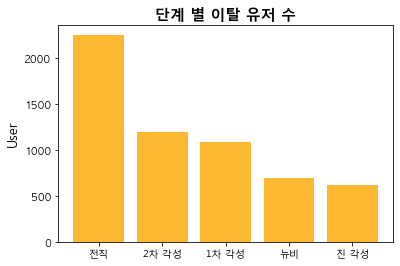

In [1628]:
leave_count = leave_user['level_category_name'].value_counts(ascending=False)
plt.bar(leave_count.index, leave_count.values, color='#FDB931')
plt.title('단계 별 이탈 유저 수', font=bold, fontsize=15)
plt.ylabel('User', font=light, fontsize=13)
plt.xticks(font=light)
plt.savefig('Leave_user.png')
plt.show()

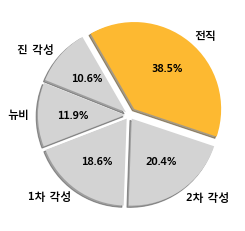

In [1633]:
ratio = leave_user['level_category_name'].value_counts() / len(leave_user)
labels = leave_user['level_category_name'].value_counts().index
explode = [0.09, 0.05, 0.05, 0.05, 0.05]
colors = ['#FDB931', 'lightgray', 'lightgray', 'lightgray', 'lightgray']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=120, counterclock=False, explode=explode, shadow=True, colors=colors, \
       textprops={'font':bold, 'fontsize':11})

plt.savefig('Leave_user_pie.png')
plt.show()


---
# 장착 장비

In [28]:
equip = pd.read_csv('/Users/hayeon/Downloads/게임 데이터 분석/DATA/장착_장비_detail.csv', index_col=0)

In [29]:
equip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51864 entries, 0 to 51863
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   slotId                           51864 non-null  object 
 1   slotName                         51864 non-null  object 
 2   itemId                           51864 non-null  object 
 3   itemName                         51864 non-null  object 
 4   itemTypeId                       51864 non-null  object 
 5   itemType                         51801 non-null  object 
 6   itemTypeDetailId                 51864 non-null  object 
 7   itemTypeDetail                   51801 non-null  object 
 8   itemAvailableLevel               51864 non-null  int64  
 9   itemRarity                       51864 non-null  object 
 10  setItemId                        14045 non-null  object 
 11  setItemName                      14045 non-null  object 
 12  reinforce         

### 장비 정보, 착용 가능 레벨, Rarity, characterid 추출

In [60]:
new_equip = equip.iloc[:, :10]
new_equip['characterId'] = equip['characterId']

In [65]:
new_equip.head(2)

,slotId,slotName,itemId,itemName,itemTypeId,itemType,itemTypeDetailId,itemTypeDetail,itemAvailableLevel,itemRarity,characterId
0,TITLE,칭호,2836124005a0f5d736f8aee252e9a2b2,던파 10년지기,e490f8cce6bacd43bef1e2f5e0c4943d,액세서리,691933a06ff114348a7db936fb0aec66,칭호,1,레어,ceaa604b0ec7cb62c5719792c3914a1e
1,WEAPON,무기,c743cfb1ae6f48afe9619fdc02b41b87,성물 : 마스테마의 폭열 광검,4ffb6f14b86f5c818a925bf58022686e,무기,bd9c897afd0825ad854f0a81fc8d42ae,광검,85,유니크,4bc36ec2cf0973a6c415e5fe279ee7a5


In [82]:
new_equip['slotName'].unique()

array(['칭호', '무기', '상의', '머리어깨', '하의', '신발', '허리', '목걸이', '팔찌', '반지',
       '보조장비', '마법석', '보조무기', '귀걸이'], dtype=object)

- 아바타를 가진 유저는 6000명 중 1882명 
- 크리쳐를 가진 유저는 6000명 중 1495명 

### 초기 유저의 적응에 도움을 주기 위함을 목적으로 하기 때문에 아바타, 크리쳐, 탈리스만은 일단 고려하지 않기로 한다
- 기본적인 장착장비와 스킬에 적응하면 추후 아바타, 크리쳐, 탈리스만의 장착에 대해서는 자연스럽게 익숙해지리라 생각한다
- 일단 게임의 스킬, 아이템 장착과 사용의 구조를 파악하게 도움을 주는 것이 목표이다

## 사용할 장착 장비 컬럼 추출

In [488]:
equip = equip[['slotId', 'slotName', 'itemId', 'itemName', 'itemTypeId', 'itemType',
       'itemTypeDetailId', 'itemTypeDetail', 'itemAvailableLevel',
       'itemRarity','characterId']]

---

# 스킬
- Active : 직접 눌러야 발동이 되는 스킬
    - SP : 캐릭터 레벨업시 일정량 지급되는 스킬 포인트(skill point)로 배우는 스킬
- Passive : 착용으로 적용되는 스킬

In [251]:
active = pd.read_csv('/Users/hayeon/Downloads/게임 데이터 분석/DATA/스킬_active.csv').drop('Unnamed: 0', axis=1)

In [94]:
active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98680 entries, 0 to 98679
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   skillId        98680 non-null  object
 1   name           98680 non-null  object
 2   level          98680 non-null  int64 
 3   requiredLevel  98680 non-null  int64 
 4   costType       98680 non-null  object
 5   characterId    98680 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.5+ MB


### 총 1438개의 Active 스킬이 존재한다

In [100]:
active.drop_duplicates('name').sort_values('requiredLevel', ascending=False)

,skillId,name,level,requiredLevel,costType,characterId
18825,6aa32e36149e8299938451f85f9d840a,부스트 : 파이널 데스퍼레이션,4,100,SP,dc79c6774c84533eab49935617e32cea
1884,94c450d6214cafdc673f763badceeaf1,데스 크라이시스,4,100,SP,d18765bc4f67009003f29b58ce116edd
18442,9ceb0c55f40f1fc0fe0fcc65c8fee3a0,삼라만상,2,100,SP,248e34e7bfa71795606c18c2dd7918c3
5289,0e3da11226dd30c2aaef52e36eff7f3f,영겁 : 나스트론드,2,100,SP,26e2dbd0cab2a2a3176ec914c2a82e16
8730,d58681f38f393dbfd22ffdb049d97002,마이크로 유니버스,2,100,SP,2289e7cac749cdb8709a1628baf45980
...,...,...,...,...,...,...
220,fc7a3f4c2852c832a2f20af63d5d212f,어퍼 슬래쉬,1,1,SP,7cb62d2f7506ab4eace8f468166823c1
268,ce7cd04a44e32212e80f120f4421996e,화염,12,1,SP,3560b00f5f044cb4bd8528f79fd8a918
524,b89c9ab317bc0a443f6497b7cca2f6a8,제국검술,1,1,SP,04073d474dbbdc8c30f8cb6cecce8551
572,717f1e2104fe4b796f800352fa143ecc,잭스파이크,1,1,SP,1c4c71d976a2a22482be4dee145447a2


### 총 1321개의 Passive 스킬이 존재한다

In [450]:
passive = pd.read_csv('/Users/hayeon/Downloads/게임 데이터 분석/DATA/스킬_passive.csv').drop(['Unnamed: 0'], axis=1)
passive.drop_duplicates('name').sort_values('requiredLevel', ascending=False)

,skillId,name,level,requiredLevel,costType,characterId
544,03bd172c9c50cfdcf9d7e83a3ef82842,종말,3,100,SP,1dd158d8f170a2d356a65ea58b8a48af
2107,560d1d8b182f750ff020bfd9e0f1aaf4,각성의 실마리,1,100,SP,315d9eb53e5ede18daa06706ebfef082
8310,5cac3411ccef1af333953e0ded5e942d,검선지경,4,95,SP,8abccb437e1d31b6a5e4152ac8be3e49
3130,82fc7ec7cfb2b7afa8c125a2d9420a78,프로스트헌트,4,95,SP,26e2dbd0cab2a2a3176ec914c2a82e16
183,5806440d21e7546d50007a5ba11f8024,대행자의 권능,7,95,SP,de2fe7e74bf97217651e6743c8289b6b
...,...,...,...,...,...,...
673,ff171dc487807bb9aa28900ca9a46b41,엘븐나이트의 판금 마스터리,1,1,SP,0a725bce92a9d40b4a04559a00238695
745,e5c09f9132a48dc1d695968592cc5878,마도학자의 가죽 갑옷 마스터리,1,1,SP,c3004535a9639367298e126608d68f1b
849,3f6e4aed67bb58ffd353135df1929d21,천 갑옷마스터리,1,1,SP,6dd90d98e2036eb876ff9ee9824b03ad
860,c61f5a010370101402b05b21916c2071,그래플러의 경갑 마스터리,1,1,SP,2b42dec896b247ebc0422ff23dc2b7f8


---

## 스킬 설명 데이터

In [622]:
skill_desc = pd.read_csv('/Users/hayeon/Downloads/게임 데이터 분석/34_skills_detail(설명).csv', index_col=0)

In [623]:
for i in range(0, len(skill_desc)):
    skill_desc['descDetail'][i] = skill_desc['descDetail'][i].replace('\n', '')

In [624]:
skill_desc.fillna('', inplace=True)

In [626]:
skill_desc['levelInfo.optionDesc'][0]

'마법 무기 공격력 : {value1}%\n\n[소울 브링어 귀참 드라이브 습득시]\n최대 충전시 공격력 증가율: {value2}%\n귀신 추가 공격력 : {value3}%\n\n[사야 공격시]\n빙결 확률 : {value4}%\n빙결 유지시간 : {value5}초\n[브레멘 공격시]\n수면 확률 : {value6}%\n수면 유지시간 : {value7}초\n\n[데모닉 크라운 습득시]\n귀신 베기 공격력 : {value8}%\n블레이드 팬텀 공격력 : {value9}%\n\n[범위 정보]\n베기 범위 비율 : {value10}%'

### → levelInfo.optionDesc의 목록이 스킬의 효과 요약이다.
## 컬럼에서 스킬이 보유한 효과 목록 추출

In [126]:
import re
import math

In [627]:
for j in range(0, len(skill_desc)):
    effect_all = []
    test = list(filter(bool, skill_desc['levelInfo.optionDesc'][j].split('\n')))
    for i in range(0, len(test)):
        effect = (test[i].split(':')[0])
        if not effect.startswith('['):
            effect_all.append(effect)

    skill_desc['levelInfo.optionDesc'][j] = effect_all


In [628]:
skill_desc['levelInfo.optionDesc'][0]

['마법 무기 공격력 ',
 '최대 충전시 공격력 증가율',
 '귀신 추가 공격력 ',
 '빙결 확률 ',
 '빙결 유지시간 ',
 '수면 확률 ',
 '수면 유지시간 ',
 '귀신 베기 공격력 ',
 '블레이드 팬텀 공격력 ',
 '베기 범위 비율 ']

## skill 상세 설명 테이블에서 사용할 컬럼 추출한다

In [629]:
skill_desc = skill_desc[['name', 'type', 'costType', 'descDetail', 'maxLevel',
          'requiredLevel', 'requiredLevelRange', 'jobId', 'jobName',
          'jobGrowLevel', 'levelInfo.optionDesc']]

In [630]:
skill_desc.head(1)

,name,type,costType,descDetail,maxLevel,requiredLevel,requiredLevelRange,jobId,jobName,jobGrowLevel,levelInfo.optionDesc
0,귀참,active,SP,무기에 귀신을 소환하여 전방 넓은 범위에 강력한 암속성 베기를 행한다.[소울 브링어...,70,1,2,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),[{'jobGrowId': '1ea40db11ff66e70bcb0add7fae44c...,"[마법 무기 공격력 , 최대 충전시 공격력 증가율, 귀신 추가 공격력 , 빙결 확률..."


---
# 데이터 병합 (user, equip, skill)

In [631]:
user_equip = pd.merge(left=user, right=equip, how='outer', on='characterId', validate='1:m')

In [632]:
user_equip.columns

Index(['serverId', 'characterId', 'characterName', 'level', 'jobId',
       'jobGrowId', 'jobName', 'jobGrowName', 'adventureName', 'guildId',
       'guildName', 'level_category', 'slotId', 'slotName', 'itemId',
       'itemName', 'itemTypeId', 'itemType', 'itemTypeDetailId',
       'itemTypeDetail', 'itemAvailableLevel', 'itemRarity'],
      dtype='object')

In [633]:
user_equip.head(1)

,serverId,characterId,characterName,level,jobId,jobGrowId,jobName,jobGrowName,adventureName,guildId,...,slotId,slotName,itemId,itemName,itemTypeId,itemType,itemTypeDetailId,itemTypeDetail,itemAvailableLevel,itemRarity
0,cain,ceaa604b0ec7cb62c5719792c3914a1e,프링,85,a5ccbaf5538981c6ef99b236c0a60b73,80ec67d0356defa46a989914caca5820,마법사(남),오블리비언,TaeYeons,NaN,...,TITLE,칭호,2836124005a0f5d736f8aee252e9a2b2,던파 10년지기,e490f8cce6bacd43bef1e2f5e0c4943d,액세서리,691933a06ff114348a7db936fb0aec66,칭호,1.0,레어


In [498]:
skill = pd.concat([active, passive])

In [534]:
skill

,skillId,name,level,requiredLevel,costType,characterId
0,ce26c6b69d02a440a81b552bec94f03b,퀵 스탠딩,1,1,SP,ceaa604b0ec7cb62c5719792c3914a1e
1,7822d6d52e10964a6755f142c666b494,백스텝,1,1,SP,ceaa604b0ec7cb62c5719792c3914a1e
2,3c5604bdbb0240b8f130f59ab40509c3,윈드 스트라이크,10,1,SP,ceaa604b0ec7cb62c5719792c3914a1e
3,5dc7008b12a459325b548b0715c6b73c,물대포,1,1,SP,ceaa604b0ec7cb62c5719792c3914a1e
4,78bd107acd474518b606be1e4fd38239,금나장,1,5,SP,ceaa604b0ec7cb62c5719792c3914a1e
...,...,...,...,...,...,...
58788,68fda64e589fe2a3490c300a7f18a829,레이저 라이플 강화,5,55,TP,fcb4f559b932fe427c44d7daae8ca435
58789,bba8f4d7781850521e8298bede7ce0ad,화염 강타 강화,5,55,TP,fcb4f559b932fe427c44d7daae8ca435
58790,249fb8b5c251b8ba265bd77bf35bcb7b,X-1 익스트루더 강화,5,55,SP,fcb4f559b932fe427c44d7daae8ca435
58791,d58681f38f393dbfd22ffdb049d97002,슈타이어 대전차포 강화,1,55,TP,fcb4f559b932fe427c44d7daae8ca435


In [637]:
user_equip_skill = pd.merge(left=user_equip, right=skill, how='outer', on='characterId')
user_equip_skill.drop('level_y', axis=1, inplace=True)
user_equip_skill.rename(columns={'level_x':'level'}, inplace=True)

In [638]:
user_equip_skill.head(1)

,serverId,characterId,characterName,level,jobId,jobGrowId,jobName,jobGrowName,adventureName,guildId,...,itemTypeId,itemType,itemTypeDetailId,itemTypeDetail,itemAvailableLevel,itemRarity,skillId,name,requiredLevel,costType
0,cain,ceaa604b0ec7cb62c5719792c3914a1e,프링,85,a5ccbaf5538981c6ef99b236c0a60b73,80ec67d0356defa46a989914caca5820,마법사(남),오블리비언,TaeYeons,NaN,...,e490f8cce6bacd43bef1e2f5e0c4943d,액세서리,691933a06ff114348a7db936fb0aec66,칭호,1.0,레어,ce26c6b69d02a440a81b552bec94f03b,퀵 스탠딩,1.0,SP


In [639]:
user_equip_skill.to_csv('user_equip_skill.csv', encoding='utf-8')

In [731]:
user.to_csv('DF_user.csv', encoding='utf-8')

In [733]:
skill.to_csv('DF_skill.csv', encoding='utf-8')

In [735]:
equip.to_csv('DF_equip.csv', encoding='utf-8')

In [737]:
skill_desc.to_csv('DF_skill_desc.csv', encoding='utf-8')

---

## I. 같은 직업, 같은 상태에 있는 유저의 장착 장비 중 가장 많이 사용하는 장비를 추천

In [650]:
equip['slotName'].unique()

array(['칭호', '무기', '상의', '머리어깨', '하의', '신발', '허리', '목걸이', '팔찌', '반지',
       '보조장비', '마법석', '보조무기', '귀걸이'], dtype=object)

In [663]:
user['jobName'].unique()

array(['마법사(남)', '귀검사(여)', '격투가(여)', '프리스트(남)', '격투가(남)', '나이트',
       '프리스트(여)', '귀검사(남)', '크리에이터', '거너(남)', '마법사(여)', '마창사', '도적',
       '총검사', '아처', '거너(여)', '다크나이트'], dtype=object)

In [668]:
# 직업 선택, 본인 레벨 선택 (카테고리로 변환 필요)
magic_male_2 = user[user['jobName']=='마법사(남)'][user[user['jobName']=='마법사(남)']['level_category']==2]

In [696]:
# 38명의 유저가 마법사(남), 1차 각성 상태에 있다
len(magic_male_2)

38

In [682]:
magic_male_2_equip =  equip[equip["characterId"].isin(magic_male_2['characterId'])]

In [686]:
magic_male_2_equip.groupby(['slotName', 'itemName']).count().sort_values('slotId', ascending=False)

slotId  itemId  itemTypeId  itemType  \
slotName itemName                                                        
무기       탄생의 아이시클 스파클러                 5       5           5         5   
허리       성물 : 영광의 오로바스의 스웨이드 새쉬        5       5           5         5   
하의       성물 : 영광의 오로바스의 스웨이드 그리브       5       5           5         5   
팔찌       하이퍼 재머                        5       5           5         5   
반지       마법의 자수정 반지                    5       5           5         5   
...                                  ...     ...         ...       ...   
         헨돈마이어 보급형 반지                  1       1           1         1   
보조장비     마수의 핏빛장갑                      1       1           1         1   
상의       갈라진 가죽 조끼                     1       1           1         1   
         강력한 일격의 천 상의改 : 다크니스 맨틀       1       1           1         1   
허리       실키얀 밴드                        1       1           1         1   

                                  itemTypeDetailId  itemTypeDetail  \
slotName itemName                                                    
무기       탄생의 아이시클 스파클러                           5               5   
허리       성물 : 영광의 오로바스의 스웨이드 새쉬                  5               5   
하의       성물 : 영광의 오로바스의 스웨이드 그리브                 5               5   
팔찌       하이퍼 재머                                  5               5   
반지       마법의 자수정 반지                              5               5   
...                                            ...             ...   
         헨돈마이어 보급형 반지                            1               1   
보조장비     마수의 핏빛장갑                                1               1   
상의       갈라진 가죽 조끼                               1               1   
         강력한 일격의 천 상의改 : 다크니스 맨틀                 1               1   
허리       실키얀 밴드                                  1               1   

                                  itemAvailableLevel  itemRarity  characterId  
slotName itemName                                                              
무기       탄생의 아이시클 스파클러                             5           5            5  
허리       성물 : 영광의 오로바스의 스웨이드 새쉬                    5           5            5  
하의       성물 : 영광의 오로바스의 스웨이드 그리브                   5           5            5  
팔찌       하이퍼 재머                                    5           5            5  
반지       마법의 자수정 반지                                5           5            5  
...                                              ...         ...          ...  
         헨돈마이어 보급형 반지                              1           1            1  
보조장비     마수의 핏빛장갑                                  1           1            1  
상의       갈라진 가죽 조끼                                 1           1            1  
         강력한 일격의 천 상의改 : 다크니스 맨틀                   1           1            1  
허리       실키얀 밴드                                    1           1            1  

[219 rows x 9 columns]

### ex) 무기 : 탄생의 아이시클 스파클러, 팔찌 : 하이퍼 재머 추천

# 장비 추천 (전직)

In [1069]:
# 같은 직업, 같은 상태에 있는 유저의 장착 장비 중 가장 많이 사용하는 장비를 추천
def equip_recommend(jobGrowName, level):
    
    if level < 15:
        level_category=0 # 1~14lv
    elif level < 50:
        level_category=1 # 15~49lv
    elif level < 75:
        level_category=2 # 50~74lv
    elif level < 100:
        level_category=3 # 75~99lv
    else:
        level_category=4 # 100~lv
        
 
    job_lev = user[user['jobGrowName']==jobGrowName][user[user['jobGrowName']==jobGrowName]['level_category']==level_category]
    job_lev_equip =  equip[equip["characterId"].isin(job_lev['characterId'])]

    print('< 장비 추천 >')
    for i, item in enumerate(job_lev_equip['slotName'].unique()):
        eq = pd.DataFrame(job_lev_equip[job_lev_equip['slotName']==item]['itemName'].value_counts()).index[0]
        print(item, '/', eq)
        
        try:
            itemName = eq
            itemName = parse.quote(itemName)
            url = 'https://api.neople.co.kr/df/items?itemName={0}&limit=10&apikey=OJnvu6JgglMMwk2pvu1jiWQLBTozkx25'.format(itemName)
            response = requests.get(url)
            contents = response.text
            json_ob = json.loads(contents)
            item_info = json_normalize(json_ob['rows'])

            itemId = item_info['itemId'][0]
            url = 'https://api.neople.co.kr/df/items/{0}?apikey=OJnvu6JgglMMwk2pvu1jiWQLBTozkx25'.format(itemId)
            response = requests.get(url)
            contents = response.text
            json_ob = json.loads(contents)
            item_desc = json_normalize(json_ob)

            effect_all = []
            test = list(filter(bool, item_desc['itemExplain'][0].split('\n')))
            for i in range(0, len(test)):
                effect = (test[i].split(':')[0])
                if not effect.startswith('['):
                    #effect_all.append(effect)
                    print('\t →', effect)

        except:
            pass

In [1071]:
equip_recommend('챔피언', 56)

< 장비 추천 >
상의 / 노스마이어 모험가를 위한 힘의 세라믹 메일
	 → 스킬 공격력 3.6% 증가
머리어깨 / 노스마이어 모험가를 위한 힘의 세라믹 맨틀
	 → 스킬 공격력 3.2% 증가
하의 / 노스마이어 모험가를 위한 힘의 세라믹 각반
	 → 스킬 공격력 3.6% 증가
신발 / 마법의 레드컬 부츠
	 → 스킬 공격력 4% 증가
허리 / 노스마이어 모험가를 위한 힘의 세라믹 벨트
	 → 스킬 공격력 3.2% 증가
목걸이 / 칠링 래빗풋
팔찌 / 마법의 오닉스 팔찌
	 → 스킬 공격력 4% 증가
반지 / 날카로운 자의 맹렬한 기세 반지
무기 / 사라이바
	 → 공격시 2% 확률로 적을 빙결상태로 만듬
	 → 스킬 공격력 9.5% 증가
칭호 / (구)비스트 슬레이어
보조장비 / 수쥬수행단의 암살 장갑
	 → 스킬 공격력 4% 증가
마법석 / 마법의 증진석
	 → 스킬 공격력 4% 증가


# 스킬 추천 (전직)

In [769]:
user_skill = pd.merge(left=user, right=skill, how='outer', on='characterId')
user_skill.drop('level_y', axis=1, inplace=True)
user_skill.rename(columns={'level_x':'level'}, inplace=True)

In [817]:
# 1레벨에서 습득 가능한 공통스킬은 제외 후 추천
basic_skill = ['기본기 숙련', '백스텝', '백스텝 강화', '퀵 스탠딩', '크리티컬 히트', '기본기 숙련 강화']

# 스킬 추천

In [1116]:
def skill_recommend(jobGrowName, level):
    
    if level < 15:
        level_category=0 # 1~14lv
    elif level < 50:
        level_category=1 # 15~49lv
    elif level < 75:
        level_category=2 # 50~74lv
    elif level < 100:
        level_category=3 # 75~99lv
    else:
        level_category=4 # 100~lv
        
    # 입력한 전직, 같은 단계 레벨의 유저 추출
    test_df = user_skill[user_skill['jobGrowName']==jobGrowName][user_skill[user_skill['jobGrowName']==jobGrowName]\
                                                                 ['level_category']==level_category]
    
    # SP / TP 스킬 테이블 분리
    skill_sp = test_df[test_df['costType']=='SP'][~test_df[test_df['costType']=='SP']['name'].isin(basic_skill)] # 레벨 1에서 습득 가능한 공통스킬 제외
    skill_tp = test_df[test_df['costType']=='TP'][~test_df[test_df['costType']=='TP']['name'].isin(basic_skill)]
    
    
    ####
    print('< 스킬 추천 > \n* SP Skill')
    
    # 같은 집단에서 쓰는 SP 스킬이 7종류 이하라면 모두 추천
    if skill_sp['name'].nunique() < 8:
        sp_num = skill_sp['name'].nunique()
        
    # 7종 이상이면 7종류 추천
    else:
        sp_num = 8
        
    
    # API에서 스킬 상세 정보 추출
    for i in range(0, sp_num):
        sp = skill_sp['name'].value_counts().index[i]
        print(sp)

        jobId = skill_sp[skill_sp['name']==sp].iloc[0]['jobId']
        skillId = skill_sp[skill_sp['name']==sp].iloc[0]['skillId']
        url = 'https://api.neople.co.kr/df/skills/{0}/{1}?apikey=OJnvu6JgglMMwk2pvu1jiWQLBTozkx25'.format(jobId, skillId)
        response = requests.get(url)
        contents = response.text
        json_ob = json.loads(contents)
        skill_info = json_normalize(json_ob)
        
        try:
            test = list(filter(bool, skill_info['levelInfo.optionDesc'][0].split('\n')))
            for i in range(0, len(test)):
                effect = (test[i].split(':')[0])

                if not effect.startswith('['):
                    #effect_all.append(effect)
                    print('\t →', effect)
        except:
            pass

        
        
    
    print('\n* TP Skill')
    #try:
    
    if skill_tp['name'].nunique() <3:
        passive_num = skill_tp['name'].nunique()
    else:
        passive_num = 3
        
    for j in range(0, passive_num):
        tp = skill_tp['name'].value_counts().index[j]
        print(tp)

        jobId = skill_tp[skill_tp['name']==tp].iloc[0]['jobId']
        skillId = skill_tp[skill_tp['name']==tp].iloc[0]['skillId']
        url = 'https://api.neople.co.kr/df/skills/{0}/{1}?apikey=OJnvu6JgglMMwk2pvu1jiWQLBTozkx25'.format(jobId, skillId)
        response = requests.get(url)
        contents = response.text
        json_ob = json.loads(contents)
        skill_info = json_normalize(json_ob)

        try:
            test = list(filter(bool, skill_info['descDetail'][0].split('\n')))
    
            for i in range(0, len(test)):
                effect = (test[i])
                if not effect.startswith('['):
                    #effect_all.append(effect)
                    print('\t →', effect)
        # TP는 레벨 50 이상이어야 습득 가능
        except:
            pass

--- 
# 결과

In [1119]:
skill_recommend('오블리비언', 85)

< 스킬 추천 > 
* SP Skill
엘레멘탈 실드
	 → 보호막 지속시간 
	 → 보호막 물리 방어력 증가량 
	 → 보호막 마법 방어력 증가량 
	 → 속성 공격력 증가율 
기초 방어구 마스터리
원소 융합
	 → 속성 마법 저항력 증가치 
	 → 속성 공격력 증가율 
페이탈 엘레멘트
	 → 크리티컬 공격력 증가량 
	 → 마법 크리티컬 확률 상승량 
윈드 스트라이크
	 → 마법 무기 공격력 
	 → 띄우는 힘 비율 
	 → 마법 무기 공격력 
	 → 혈기 흡수율 
	 → 공격력 증가율 
라이트닝 월
	 → 빛의 장막 공격력 
	 → 라이트닝 월 크기 비율 
불사
	 → 회복 모드 피해 증폭률 
	 → 사망 시 즉시 회복되는 HP 비율 
	 → 회복 모드 지속시간(일반던전) 
	 → 회복 모드 지속시간(망자의 협곡) 
검은 눈
	 → 기본 공격 및 스킬 공격력 증가량 
	 → 스킬 MP 소모 감소율 
	 → 엘레멘탈 캐넌 마법 구체, 폭발 크기 변환율 
	 → 파이어 로드 불기둥 생성 속도 변환율 
	 → 아이스 크리스탈 샤워 범위, 얼음 크기 변환율 
	 → 암전 범위 증가율 
	 → 플레임 서클 범위 증가율 

* TP Skill
아이스 크리스탈 샤워 강화
	 → 아이스 크리스탈 샤워의 지속시간과 쿨타임, 다단히트 간격이 감소한다.
	 → 지속시간 감소치 : 1.5초
	 → 쿨타임 감소치 : 3초
	 → 얼음기둥 다단히트 간격 감소율 : 40%
파이어로드 강화
	 → 최초 습득시 파이어 로드에 새로운 불줄기가 추가되고 습득레벨에 따라 공격력이 증가한다.
	 → 최초 습득시 새로운 불줄기 추가수 : 2줄
	 → 1레벨당 공격력 증가율 : 10%
라이트닝 월 강화
	 → 라이트닝 월의 공격력이 증가한다.
	 → 1레벨당 공격력 증가율 : 10%


In [1120]:
equip_recommend('오블리비언', 85)

< 장비 추천 >
칭호 / 해적왕의 금은
	 → 물리 공격력, 마법 공격력, 독립 공격력 옵션은 캐릭터의 레벨(최대 85Lv)에 비례하여 증가합니다.
무기 / 그라시아 가문의 유산 - 스태프
	 → 스킬 공격력 43% 증가
상의 / 라이트닝 스톰 어비스 상의
머리어깨 / 라이트닝 스톰 어비스 어깨
하의 / 라이트닝 스톰 어비스 하의
신발 / 라이트닝 스톰 어비스 신발
허리 / 라이트닝 스톰 어비스 벨트
목걸이 / 라이트닝 스톰 어비스 네클레스
팔찌 / 라이트닝 스톰 어비스 암릿
반지 / 라이트닝 스톰 어비스 링
보조장비 / 라이트닝 스톰 어비스 완장
마법석 / 기계 용의 정수
귀걸이 / 마법의 줄타나이트 이어링
	 → 스킬 공격력 6.1%증가


## 의의
- 많은 아이템, 스킬이 존재하는 던전앤파이터
- 새로운 진입 유저에게 비슷한 상황의 유저들이 많이 사용하는 아이템, 스킬을 추천함으로써 던전앤파이터의 게임 구조에 수월하게 적응하는 데 도움을 주어 이탈 방지에 기여할 수 있다.

In [1123]:
# 1. 엑셀 파일 열기 w/ExcelWriter
writer = pd.ExcelWriter('ALL_DF.xlsx', engine='xlsxwriter')

# 2. 시트별 데이터 추가하기(1개 시트로 저장할때와 유사)
user.to_excel(writer, sheet_name= 'sheet1')
equip.to_excel(writer, sheet_name= 'sheet2')
skill.to_excel(writer, sheet_name= 'sheet3')

# 3. 엑셀 파일 저장하기
writer.save()